# 데이터 전처리

In [2]:
import os
import csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

plt.rcParams['figure.figsize'] = [10, 6]
font_path = 'cluster/NanumFontSetup_TTF_ALL/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=15)

data = {}

def readCsv(data):
    path = os.path.join('data2', data)
    csvFiles = []
    for idx, f in enumerate(os.listdir(path)):
        csvFiles.append(pd.read_csv(os.path.join(path, f), encoding='utf-8'))
    if data == '상권영역':
        return pd.DataFrame.merge(csvFiles[0], csvFiles[1], on='시군구_코드')[['상권_코드', '상권_코드_명', '시군구명']].drop_duplicates(subset=['상권_코드']).reset_index(drop=True)
    else:
        return pd.concat(csvFiles)

dirList = os.listdir('data2')
for d in dirList:
    data[d] = readCsv(d)

data['상권매출'] = pd.DataFrame.merge(data['상권매출'], data['상권영역'], on=['상권_코드', '상권_코드_명'])

data['서비스'] = data['상권매출'][['서비스_업종_코드', '서비스_업종_코드_명']].drop_duplicates(subset=['서비스_업종_코드']).reset_index(drop=True)
data['서비스'] = data['서비스'].sort_values(['서비스_업종_코드']).reset_index(drop=True)
data['서비스']['중분류_서비스'] = np.zeros(data['서비스'].shape[0])
data['서비스']['대분류_서비스'] = np.zeros(data['서비스'].shape[0])
for i in range(data['서비스'].shape[0]):
    if 'CS1' in data['서비스']['서비스_업종_코드'][i]:
        data['서비스']['중분류_서비스'][i] = '음식업'
        data['서비스']['대분류_서비스'][i] = '외식업'
    elif 'CS2' in data['서비스']['서비스_업종_코드'][i]:
        if int(data['서비스']['서비스_업종_코드'][i][-2:]) < 4:
            data['서비스']['중분류_서비스'][i] = '학문교육'
        elif int(data['서비스']['서비스_업종_코드'][i][-2:]) < 7:
            data['서비스']['중분류_서비스'][i] = '의약의료'
        elif int(data['서비스']['서비스_업종_코드'][i][-2:]) == 8:
            data['서비스']['중분류_서비스'][i] = '부동산'
        elif int(data['서비스']['서비스_업종_코드'][i][-2:]) < 13:
            data['서비스']['중분류_서비스'][i] = '여가오락'
        elif int(data['서비스']['서비스_업종_코드'][i][-2:]) < 16:
            data['서비스']['중분류_서비스'][i] = '생활서비스'
        else:
            data['서비스']['중분류_서비스'][i] = '미용'
        data['서비스']['대분류_서비스'][i] = '서비스업'
    else:
        if int(data['서비스']['서비스_업종_코드'][i][-2:]) < 3:
            data['서비스']['중분류_서비스'][i] = '소매업'
        elif int(data['서비스']['서비스_업종_코드'][i][-2:]) < 5:
            data['서비스']['중분류_서비스'][i] = 'IT기기'
        elif int(data['서비스']['서비스_업종_코드'][i][-2:]) < 7:
            data['서비스']['중분류_서비스'][i] = '소매업'
        elif int(data['서비스']['서비스_업종_코드'][i][-2:]) < 9:
            data['서비스']['중분류_서비스'][i] = '의류'
        elif int(data['서비스']['서비스_업종_코드'][i][-2:]) == 9:
            data['서비스']['중분류_서비스'][i] = '의약의료'
        elif int(data['서비스']['서비스_업종_코드'][i][-2:]) == 10:
            data['서비스']['중분류_서비스'][i] = '소매업'
        elif int(data['서비스']['서비스_업종_코드'][i][-2:]) == 11:
            data['서비스']['중분류_서비스'][i] = '미용'
        elif int(data['서비스']['서비스_업종_코드'][i][-2:]) == 12:
            data['서비스']['중분류_서비스'][i] = '여가오락'
        elif int(data['서비스']['서비스_업종_코드'][i][-2:]) == 13:
            data['서비스']['중분류_서비스'][i] = '의류'
        elif int(data['서비스']['서비스_업종_코드'][i][-2:]) == 14:
            data['서비스']['중분류_서비스'][i] = '소매업'
        elif int(data['서비스']['서비스_업종_코드'][i][-2:]) < 16:
            data['서비스']['중분류_서비스'][i] = '소매업'
        else:
            data['서비스']['중분류_서비스'][i] = 'IT기기'
        data['서비스']['대분류_서비스'][i] = '도소매업'

data['상권'] = data['상권매출'][['상권_코드', '상권_코드_명']].drop_duplicates(subset=['상권_코드']).reset_index(drop=True)
data['상권점포'] = data['상권점포'].drop(['상권_구분_코드', '상권_구분_코드_명'], axis=1)
data['매출_점포'] = pd.DataFrame.merge(data['상권매출'], data['상권점포'])
data['매출_점포']['점포당_매출'] = np.zeros(data['매출_점포'].shape[0])
for i in range(data['매출_점포'].shape[0]):
    if data['매출_점포']['유사_업종_점포_수'][i] == 0 and data['매출_점포']['당월_매출_금액'][i] > 0:
        data['매출_점포']['유사_업종_점포_수'][i] = 1
data['매출_점포']['점포당_매출'] = data['매출_점포']['당월_매출_금액'] / (data['매출_점포']['유사_업종_점포_수'])
data['매출_점포'] = pd.DataFrame.merge(data['매출_점포'], data['서비스']).sort_values(['기준_년_코드', '기준_분기_코드']).reset_index(
    drop=True)
data['상권추정유동인구'] = pd.DataFrame.merge(data['상권추정유동인구'], data['상권영역']).reset_index(drop=True)
data['상권상주인구'] = pd.DataFrame.merge(data['상권상주인구'], data['상권영역']).reset_index(drop=True)

C:\Users\JW\anaconda3\envs\python3.7\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\JW\anaconda3\envs\python3.7\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\JW\anaconda3\envs\python3.7\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\JW\anac

# 상권분석

In [ ]:
selectedReg = '강남구'
# sales results
df = data['매출_점포'].sort_values(['기준_년_코드', '기준_분기_코드']).reset_index(drop=True)
arr = []
for i in range(df.shape[0]):
    arr.append('{}_{}'.format(df['기준_년_코드'][i], df['기준_분기_코드'][i]))
df['년도_분기'] = arr
df = df[df['시군구명'] == selectedReg]
serviceArr = list(set(list(data['서비스']['중분류_서비스'])))

# 결측값
serviceArr.remove('부동산')
serviceArr.remove('생활서비스')
serviceArr.remove('의류')

newDf = []
for x in serviceArr:
    y_data = []
    label = list(set(list(df['년도_분기'])))
    label.sort()
    #label = label[-4:]
    index = np.arange(len(label))
    for y in label:
        tmp = df[(df['중분류_서비스'] == x) & (df['년도_분기'] == y)]
        y_data.append(pd.DataFrame.mean(tmp['점포당_매출']))
    ax = plt.subplot(1, 1, 1)
    ax.bar(index, y_data, width=0.3)
    plt.title(x, fontsize=20, fontproperties=fontprop)
    plt.xlabel('년도_분기', fontsize=18, fontproperties=fontprop)
    plt.ylabel('점포당_매출', fontsize=18, fontproperties=fontprop)
    plt.xticks(index, label, fontsize=10)
    for l in ax.xaxis.get_ticklabels():
        l.set_rotation(45)
    plt.savefig(os.path.join('results', 'sales', '{}.png'.format(x)))
    plt.close()
    def getGap(target=None, mean=False):
        if mean:
            return pd.DataFrame.mean(df[(df['중분류_서비스'] == x) & (df['년도_분기'] == label[-1])][target]), pd.DataFrame.mean(df[(df['중분류_서비스'] == x) & (df['년도_분기'] == label[-1])][target]) - pd.DataFrame.mean(df[(df['중분류_서비스'] == x) & (df['년도_분기'] == label[-3])][target])
        else:
            return pd.DataFrame.sum(df[(df['중분류_서비스'] == x) & (df['년도_분기'] == label[-1])][target]), pd.DataFrame.sum(df[(df['중분류_서비스'] == x) & (df['년도_분기'] == label[-1])][target]) - pd.DataFrame.sum(df[(df['중분류_서비스'] == x) & (df['년도_분기'] == label[-3])][target])
        
    sales, salesGap = getGap('점포당_매출', True)
    stores, storesGap = getGap('유사_업종_점포_수')
    newDf.append([x, sales, salesGap, stores, storesGap])
    
newDf = pd.DataFrame(newDf)
newDf.columns = ['업종', '점포당 매출', '점포당 매출 변화(6개월)', '점포 수', '점포 수 변화(6개월)']
newDf.to_csv(os.path.join('results', 'sales', 'sales.csv'), encoding='euc-kr', index=False)

df = df[df['년도_분기'] == '2020_1']
for x in serviceArr:
    tmp = df[df['중분류_서비스'] == x]
    label = ['월', '화', '수', '목', '금', '토', '일']
    index = np.arange(len(label))
    y_data = []
    for w in label:
        y_data.append(pd.DataFrame.mean(tmp['{}요일_매출_금액'.format(w)]))
    plt.bar(index, y_data, width=0.5)
    plt.title(x, fontsize=20, fontproperties=fontprop)
    plt.xlabel('요일', fontsize=18, fontproperties=fontprop)
    plt.ylabel('매출', fontsize=18, fontproperties=fontprop)
    plt.xticks(index, label, fontsize=15, fontproperties=fontprop)
    plt.savefig(os.path.join('results', 'sales', '요일별_{}.png'.format(x)))
    plt.close()
    
    label = ['00~06', '06~11', '11~14', '14~17', '17~21', '21~24']
    index = np.arange(len(label))
    y_data = []
    for w in label:
        y_data.append(pd.DataFrame.mean(tmp['시간대_{}_매출_금액'.format(w)]))
    plt.bar(index, y_data, width=0.5)
    plt.title(x, fontsize=20, fontproperties=fontprop)
    plt.xlabel('시간', fontsize=18, fontproperties=fontprop)
    plt.ylabel('매출', fontsize=18, fontproperties=fontprop)
    plt.xticks(index, label, fontsize=15, fontproperties=fontprop)
    plt.savefig(os.path.join('results', 'sales', '시간대별_{}.png'.format(x)))
    plt.close()
    
    label = [10, 20, 30, 40, 50, '60_이상']
    index = np.arange(len(label))
    y_data = []
    for w in label:
        y_data.append(pd.DataFrame.mean(tmp['연령대_{}_매출_금액'.format(w)]))
    plt.bar(index, y_data, width=0.5)
    plt.title(x, fontsize=20, fontproperties=fontprop)
    plt.xlabel('연령', fontsize=18, fontproperties=fontprop)
    plt.ylabel('매출', fontsize=18, fontproperties=fontprop)
    plt.xticks(index, label, fontsize=15, fontproperties=fontprop)
    plt.savefig(os.path.join('results', 'sales', '연령대별_{}.png'.format(x)))
    plt.close()    


# floating results
df = data['상권추정유동인구'].sort_values(['기준_년_코드', '기준_분기_코드']).reset_index(drop=True)
arr = []
for i in range(df.shape[0]):
    arr.append('{}_{}'.format(df['기준_년_코드'][i], df['기준_분기_코드'][i]))
df['년도_분기'] = arr
df = df[(df['시군구명'] == selectedReg) & (df['년도_분기'] == '2020_1')]
# 요일별
bar_width = 0.35
alpha = 0.5
g = []
label = [10, 20, 30, 40, 50, '60_이상']
index = np.arange(len(label))
for idx, s in enumerate(['남성', '여성']):
    g.append([])
    for o in label:
        tmp = []
        for w in ['월', '화', '수', '목', '금', '토', '일']:
            for t in range(1, 7):
                selected = '{}연령대_{}_{}요일시간대_{}_유동인구_수'.format(s, o, w, t)
                tmp.append(pd.DataFrame.mean(df[selected]))
        g[idx].append(np.average(tmp))
p1 = plt.bar(index, g[0], 
         bar_width, 
         color='b', 
         alpha=alpha,
         label='Male')
p2 = plt.bar(index + bar_width, g[1], 
             bar_width, 
             color='r', 
             alpha=alpha,
             label='Female')
plt.title('연령별 추정유동인구', fontsize=20, fontproperties=fontprop)
plt.xlabel('연령대', fontsize=18, fontproperties=fontprop)
plt.ylabel('추정_유동_인구', fontsize=18, fontproperties=fontprop)
plt.xticks(index, label, fontsize=15, fontproperties=fontprop)
plt.legend((p1[0], p2[0]), ('Male', 'Female'), fontsize=15)
plt.savefig(os.path.join('results', 'floating', '연령대별.png'))
plt.close()

g = []
label = ['월', '화', '수', '목', '금', '토', '일']
index = np.arange(len(label))
for idx, s in enumerate(['남성', '여성']):
    g.append([])
    for w in label:
        tmp = []
        for o in [10, 20, 30, 40, 50, '60_이상']:
            for t in range(1, 7):
                selected = '{}연령대_{}_{}요일시간대_{}_유동인구_수'.format(s, o, w, t)
                tmp.append(pd.DataFrame.mean(df[selected]))
        g[idx].append(np.average(tmp))
p1 = plt.bar(index, g[0], 
         bar_width, 
         color='b', 
         alpha=alpha,
         label='Male')
p2 = plt.bar(index + bar_width, g[1], 
             bar_width, 
             color='r', 
             alpha=alpha,
             label='Female')
plt.title('요일별 추정유동인구', fontsize=20, fontproperties=fontprop)
plt.xlabel('연령대', fontsize=18, fontproperties=fontprop)
plt.ylabel('추정_유동_인구', fontsize=18, fontproperties=fontprop)
plt.xticks(index, label, fontsize=15, fontproperties=fontprop)
plt.legend((p1[0], p2[0]), ('Male', 'Female'), fontsize=15)
plt.savefig(os.path.join('results', 'floating', '요일별.png'))
plt.close()

g = []
label = list(range(1, 7))
index = np.arange(len(label))
for idx, s in enumerate(['남성', '여성']):
    g.append([])
    for t in label:
        tmp = []
        for o in [10, 20, 30, 40, 50, '60_이상']:
            for w in ['월', '화', '수', '목', '금', '토', '일']:
                selected = '{}연령대_{}_{}요일시간대_{}_유동인구_수'.format(s, o, w, t)
                tmp.append(pd.DataFrame.mean(df[selected]))
        g[idx].append(np.average(tmp))
p1 = plt.bar(index, g[0], 
         bar_width, 
         color='b', 
         alpha=alpha,
         label='Male')
p2 = plt.bar(index + bar_width, g[1], 
             bar_width, 
             color='r', 
             alpha=alpha,
             label='Female')
plt.title('시간대별 추정유동인구', fontsize=20, fontproperties=fontprop)
plt.xlabel('연령대', fontsize=18, fontproperties=fontprop)
plt.ylabel('추정_유동_인구', fontsize=18, fontproperties=fontprop)
plt.xticks(index, label, fontsize=15, fontproperties=fontprop)
plt.legend((p1[0], p2[0]), ('Male', 'Female'), fontsize=15)
plt.savefig(os.path.join('results', 'floating', '시간대별.png'))
plt.close()

# 매출 예측

### 데이터 전처리

In [109]:
def lerp(start, stop, amount):
    return start + (stop - start) * amount

commonCols = ['기준_년_코드', '기준_분기_코드','상권_구분_코드', '상권_코드']
arr = []
for c in data['매출_점포'].columns:
#     if '금액' in c or '비율' in c:
    if '금액' in c:
        arr.append(c)
        
if not os.path.isfile(os.path.join('data2', '분석', '분석.csv')):
    data['분석'] = data['매출_점포'][commonCols + ['서비스_업종_코드', '대분류_서비스', '점포당_매출'] + arr]
    data['분석'] = pd.DataFrame.merge(data['분석'], data['상권점포'].drop(['상권_코드_명', '서비스_업종_코드_명'], axis=1))
    #data['분석'] =  pd.DataFrame.merge(data['분석'], data['상권변화지표'][['기준_년_코드', '기준_분기_코드', '상권_코드', '상권_변화_지표']])
    data['분석'] = pd.DataFrame.merge(data['분석'], data['상권추정유동인구'][['기준_년_코드', '기준_분기_코드', '상권_코드', '총_유동인구_수', '남성_유동인구_수', '여성_유동인구_수']])
    data['분석'] = pd.DataFrame.merge(data['분석'], data['상권직장인구'][['기준_년_코드', '기준_분기_코드', '상권_코드', '총_직장_인구_수', '남성_직장_인구_수', '여성_직장_인구_수']])
    data['분석'] = pd.DataFrame.merge(data['분석'], data['상권영역'][['상권_코드', '시군구명']])
    #data['분석'] = pd.DataFrame.merge(data['분석'], data['상권아파트'].drop(['상권_구분_코드_명', '상권_코드_명'], axis=1))

# for idx in range(data['서비스'].shape[0]):
#     data[data['서비스']['서비스_업종_코드_명'][idx]] = data['분석'][data['분석']['서비스_업종_코드'] == data['서비스']['서비스_업종_코드'][idx]].reset_index(drop=True)
#     data[data['서비스']['서비스_업종_코드_명'][idx]] = data[data['서비스']['서비스_업종_코드_명'][idx]].fillna(data[data['서비스']['서비스_업종_코드_명'][idx]].mean())

for idx in np.unique(data['매출_점포']['대분류_서비스']):
    if not os.path.isfile(os.path.join('data2', idx, '{}.csv'.format(idx))):
        data[idx] = data['분석'][data['분석']['대분류_서비스'] == idx].reset_index(drop=True)
        data[idx] = data[idx].fillna(data[idx].mean())

selectedSector = '외식업'

sgList = np.unique(data['분석'][data['분석']['시군구명'] == selectedReg]['상권_코드'])
for sg in sgList:
    data['{}_{}'.format(selectedSector, sg)] = data[selectedSector][(data[selectedSector]['상권_코드'] == sg)].reset_index(drop=True)
    arr = []
    for i in range(data['{}_{}'.format(selectedSector, sg)].shape[0]):
        arr.append('{}_{}'.format(data['{}_{}'.format(selectedSector, sg)]['기준_년_코드'][i], data['{}_{}'.format(selectedSector, sg)]['기준_분기_코드'][i]))
    data['{}_{}'.format(selectedSector, sg)]['년도_분기'] = arr
    
    arr = []
    for y in np.unique(data['{}_{}'.format(selectedSector, sg)]['년도_분기']):
        tmp = data['{}_{}'.format(selectedSector, sg)][data['{}_{}'.format(selectedSector, sg)]['년도_분기'] == y]
        arr2 = []
        cols = []
        for c in tmp.columns[6:-2]:
            try:
                arr2.append(np.mean(tmp[c]))
                cols.append(c)
            except Exception as e:
                print(e.args)
                pass
        arr.append(arr2)
    df = pd.DataFrame(arr)
    df.columns = cols
    data['{}_{}'.format(selectedSector, sg)] = df
    
    data['보간_{}_{}'.format(selectedSector, sg)] = pd.DataFrame()
    for c in data['{}_{}'.format(selectedSector, sg)]:
        testArr = []
        numDots = 90
        spacing = 1 / (numDots - 1)
        for z in range(data['{}_{}'.format(selectedSector, sg)].shape[0]-1):
            for i in range(numDots):
                try:
                    testArr.append(lerp(data['{}_{}'.format(selectedSector, sg)][c].iloc[z], data['{}_{}'.format(selectedSector, sg)][c].iloc[z+1], spacing*i))
                except Exception as e:
                    pass
        try:
            data['보간_{}_{}'.format(selectedSector, sg)][c] = testArr
        except Exception as e:
            pass


In [107]:
data['도소매업'].to_csv(os.path.join('data2', '도소매업', '도소매업.csv'), encoding='utf-8', index=False)

### 랜덤포레스트를 활용한 변수추출

C:\Users\JW\anaconda3\envs\python3.7\lib\site-packages\ipykernel_launcher.py:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


훈련 세트 정확도 : 0.996
테스트 세트 정확도 : 0.978
유사_업종_점포_수: 0.33896404195299673
당월_매출_금액: 0.29453461058773867
시간대_17~21_매출_금액: 0.21068095626225541
일요일_매출_금액: 0.028714021706698723
주중_매출_금액: 0.011715957714809926
금요일_매출_금액: 0.011394754335403311
점포_수: 0.010261102759121577


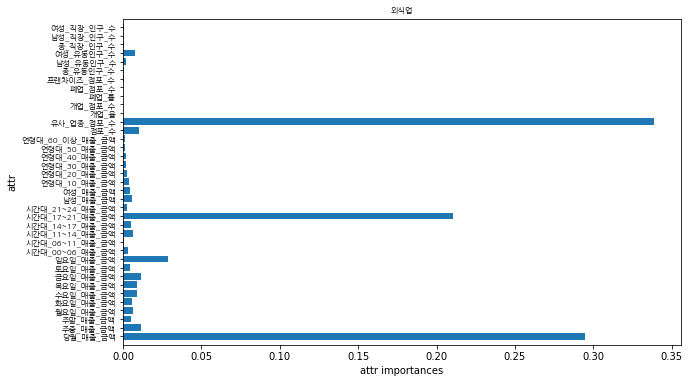

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
#import mglearn
import numpy as np

# 특성 중요도 시각화 하기
def plot_feature_importances_cancer(model, t):
    n_features = df.shape[1] - 1
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df.columns[1:], fontproperties=fontprop)
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1, n_features)
    plt.title(t, fontproperties=fontprop)
    plt.show()
    plt.close()

#df = pd.read_csv('test.csv', encoding='euc-kr')

# df = data['한식음식점'].drop(['상권_구분_코드_명', '상권_코드_명'], axis=1)

#for s in data['서비스']['서비스_업종_코드_명']:

try:
    df = data[selectedSectors]
    df = pd.DataFrame.merge(df, data['상권영역'][['상권_코드', '시군구명']]).drop(data[s].columns[:6], axis=1)
    df = df[df['시군구명'] == selectedReg].drop(['시군구명'], axis=1)
    cols = df.columns
    scaler = MinMaxScaler()
    df = pd.DataFrame(scaler.fit_transform(df))
    df.columns = cols
    # 훈련/테스트 세트로 나누기

    feature_cols = df.columns[1:]
    label_cols = ['점포당_매출']

    # 독립변수와 종속변수 분리
    # train_feature = train[feature_cols]
    # train_label = train[label_cols]
    # test_feature = test[feature_cols]
    # test_label = test[label_cols]
    X_train, X_test, y_train, y_test = train_test_split(df[feature_cols], df[label_cols], test_size=0.3, random_state=777)

    forest = RandomForestRegressor(n_estimators=100,random_state=777)

    forest.fit(X_train,y_train)


    print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
    print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))


    # 특성 중요도
    # print("특성 중요도 : \n{}".format(forest.feature_importances_))
    # print(np.sort(forest.feature_importances_)[::-1])

    # 랜덤포레스트로 변수추출
    selectedFeatures = []
    argArr = np.argsort(-1*forest.feature_importances_)
    for idx, a in enumerate(argArr):
        if idx > 10 or forest.feature_importances_[a] < 0.01:
            break
        print('{}: {}'.format(df.columns[1:][a], forest.feature_importances_[a]))
        selectedFeatures.append(df.columns[1:][a])

    fontprop = fm.FontProperties(fname=font_path, size=8)
    plot_feature_importances_cancer(forest, s)
except Exception as e:
    print(e.args)
    pass





### LSTM

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 128)               69632     
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 129       
Total params: 69,761
Trainable params: 69,761
Non-trainable params: 0
_________________________________________________________________
Train on 1354 samples, validate on 151 samples
Epoch 1/100
1344/1354 [============================>.] - ETA: 0s - loss: 0.0440
Epoch 00001: val_loss improved from inf to 0.00272, saving model to 외식업_1000886.h5
1354/1354 [==============================] - 9s 6ms/sample - loss: 0.0437 - val_loss: 0.0027
Epoch 2/100
1344/1354 [============================>.] - ETA: 0s - loss: 0.0033
Epoch 00002: val_loss improved from 0.00272 to 0.00211, saving model to 외식업_1000886.h5
1354/1354 [==============================

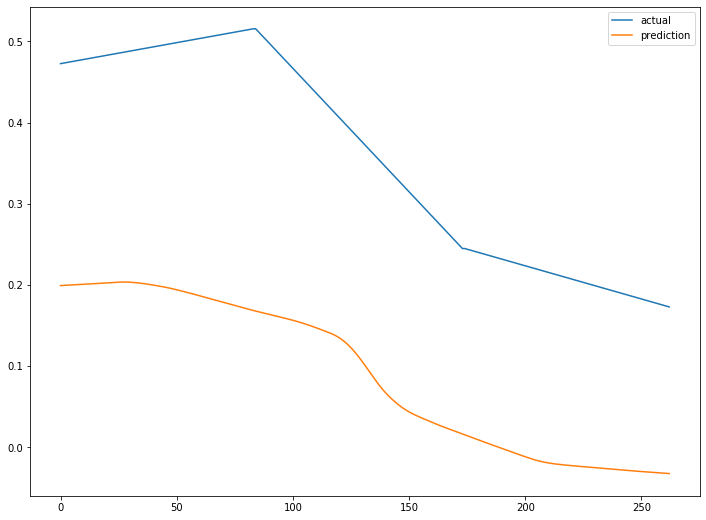

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_31 (LSTM)               (None, 128)               69632     
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 129       
Total params: 69,761
Trainable params: 69,761
Non-trainable params: 0
_________________________________________________________________
Train on 1354 samples, validate on 151 samples
Epoch 1/100
1344/1354 [============================>.] - ETA: 0s - loss: 0.0167
Epoch 00001: val_loss improved from inf to 0.13954, saving model to 외식업_1000887.h5
1354/1354 [==============================] - 8s 6ms/sample - loss: 0.0167 - val_loss: 0.1395
Epoch 2/100
1344/1354 [============================>.] - ETA: 0s - loss: 0.0070
Epoch 00002: val_loss did not improve from 0.13954
1354/1354 [==============================] - 7s 5ms/sample - loss: 0.0070 - v

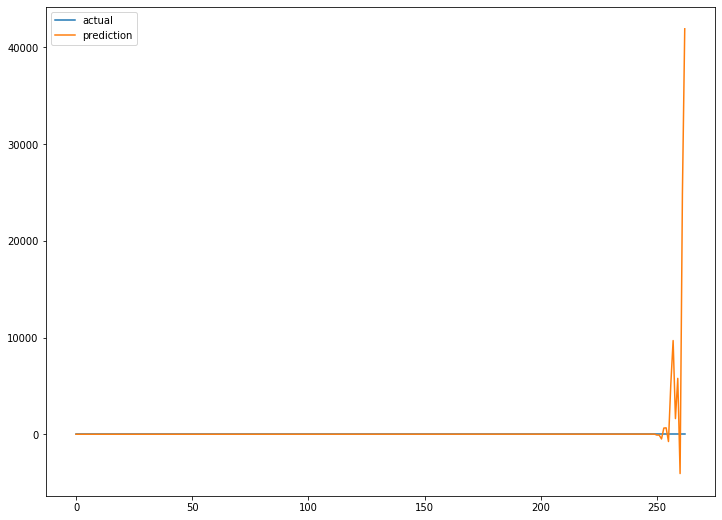

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 128)               69632     
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 129       
Total params: 69,761
Trainable params: 69,761
Non-trainable params: 0
_________________________________________________________________
Train on 1354 samples, validate on 151 samples
Epoch 1/100
1344/1354 [============================>.] - ETA: 0s - loss: 0.0094
Epoch 00001: val_loss improved from inf to 0.10098, saving model to 외식업_1000888.h5
1354/1354 [==============================] - 8s 6ms/sample - loss: 0.0093 - val_loss: 0.1010
Epoch 2/100
1344/1354 [============================>.] - ETA: 0s - loss: 0.0013
Epoch 00002: val_loss improved from 0.10098 to 0.01229, saving model to 외식업_1000888.h5
1354/1354 [==============================

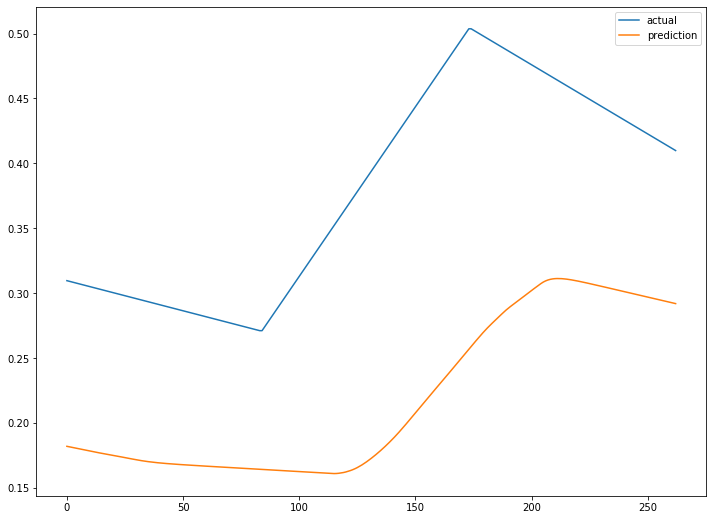

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_33 (LSTM)               (None, 128)               69632     
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 129       
Total params: 69,761
Trainable params: 69,761
Non-trainable params: 0
_________________________________________________________________
Train on 1354 samples, validate on 151 samples
Epoch 1/100
1344/1354 [============================>.] - ETA: 0s - loss: 0.0142
Epoch 00001: val_loss improved from inf to 0.00314, saving model to 외식업_1000889.h5
1354/1354 [==============================] - 8s 6ms/sample - loss: 0.0141 - val_loss: 0.0031
Epoch 2/100
1344/1354 [============================>.] - ETA: 0s - loss: 0.0010
Epoch 00002: val_loss did not improve from 0.00314
1354/1354 [==============================] - 7s 5ms/sample - loss: 9.9995e-04

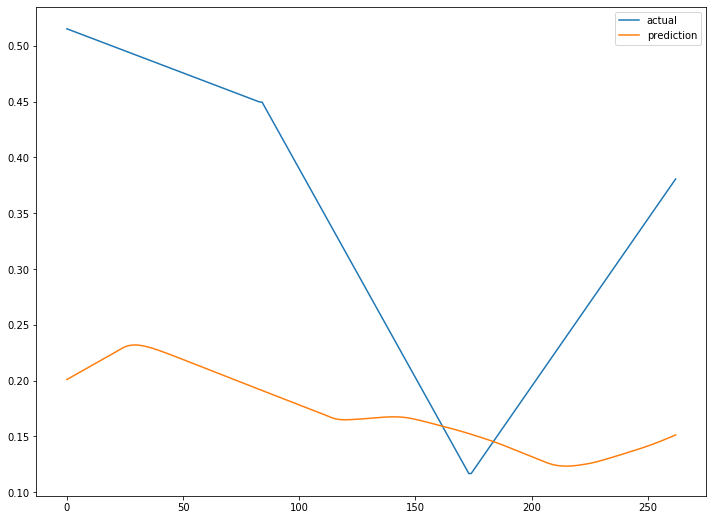

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_34 (LSTM)               (None, 128)               69632     
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 129       
Total params: 69,761
Trainable params: 69,761
Non-trainable params: 0
_________________________________________________________________
Train on 1354 samples, validate on 151 samples
Epoch 1/100
1344/1354 [============================>.] - ETA: 0s - loss: 0.0234
Epoch 00001: val_loss improved from inf to 0.05843, saving model to 외식업_1000890.h5
1354/1354 [==============================] - 8s 6ms/sample - loss: 0.0234 - val_loss: 0.0584
Epoch 2/100
 144/1354 [==>...........................] - ETA: 5s - loss: 0.0120WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


KeyboardInterrupt: 

In [117]:
import csv
import os

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size -1 - 30):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size+30]))
    return np.array(feature_list), np.array(label_list)

finalDf = []
for sg in sgList:
    try:
        df = data['보간_{}_{}'.format(selectedSector, sg)]
        cols = df.columns
        scaler = MinMaxScaler()
        df = pd.DataFrame(scaler.fit_transform(df))
        df.columns = cols

        TEST_SIZE = int(df.shape[0] * 0.2)
        WINDOW_SIZE = 120

        train = df[:-TEST_SIZE]
        test = df[-TEST_SIZE:]

        feature_cols = selectedFeatures
        label_cols = ['점포당_매출']

        train_feature = train[feature_cols]
        train_label = train[label_cols]
        test_feature = test[feature_cols]
        test_label = test[label_cols]


        train_feature, train_label = make_dataset(train_feature, train_label, WINDOW_SIZE)
        x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.1, shuffle=False)

        test_feature, test_label = make_dataset(test_feature, test_label, WINDOW_SIZE)

        tomorrow_feature = np.array(df[-WINDOW_SIZE:][feature_cols])

        model = Sequential()
        model.add(LSTM(128,
                       input_shape=(train_feature.shape[1], train_feature.shape[2]),
                       activation='relu',
                       return_sequences=False
                       )
                  )
        model.add(Dense(1))
        model.summary()

        callback_filename = os.path.join('{}_{}.h5'.format(selectedSector, sg))

        callback_list = []
        model.compile(optimizer=Adam(), loss='mse')
        callback_list.append(EarlyStopping(monitor='val_loss', patience=5))
        callback_list.append(ModelCheckpoint(callback_filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto'))

        model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=16,
                    validation_data=(x_valid, y_valid),
                    callbacks=callback_list)

        model.load_weights(callback_filename)

        pred = model.predict(test_feature)
        pred = np.array(pred)

        plt.figure(figsize=(12, 9))
        plt.plot(test_label, label='actual')
        plt.plot(pred, label='prediction')
        plt.legend()
        plt.show()

        maxVal = np.max(data['보간_{}_{}'.format(selectedSector, sg)]['점포당_매출'])
        minVal = np.min(data['보간_{}_{}'.format(selectedSector, sg)]['점포당_매출'])
        tomorrow_feature = np.reshape(tomorrow_feature, (1, 120, 7))
        lastPred = np.reshape(model.predict(tomorrow_feature), -1)[0]
        finalDf.append([sg , lastPred*(maxVal-minVal) + minVal])
    except Exception as e:
        print(e.args)
        pass
finalDf = pd.DataFrame(finalDf)
finalDf.columns = ['상권_코드', '예측']
finalDf